Given:  
exp data of (IIa+IIam) + no ODE

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

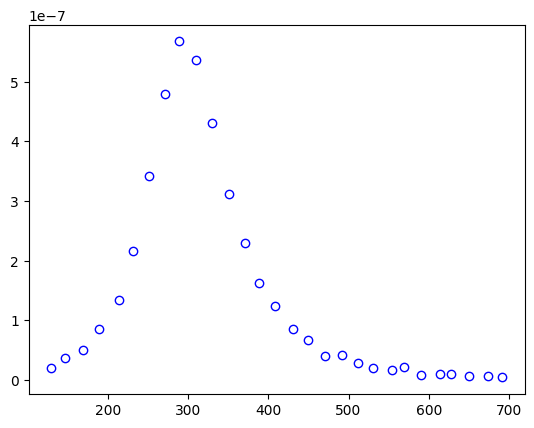

In [2]:
exp_data_1 = np.loadtxt("../../data/exp_data_case_3.dat").T
t_exp_1 = exp_data_1[0].reshape([-1, 1])
u_exp_1 = exp_data_1[1].reshape([-1, 1])

plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
plt.show()

In [3]:
t_exp_1.shape

(29, 1)

In [4]:
print(u_exp_1)

[[1.99793e-08]
 [3.75750e-08]
 [4.98921e-08]
 [8.50836e-08]
 [1.34352e-07]
 [2.15292e-07]
 [3.41982e-07]
 [4.79229e-07]
 [5.67208e-07]
 [5.35536e-07]
 [4.29961e-07]
 [3.12069e-07]
 [2.29369e-07]
 [1.62505e-07]
 [1.23794e-07]
 [8.50836e-08]
 [6.74879e-08]
 [3.93346e-08]
 [4.10942e-08]
 [2.87772e-08]
 [1.99793e-08]
 [1.64601e-08]
 [2.17388e-08]
 [7.66221e-09]
 [9.42179e-09]
 [9.42179e-09]
 [5.90264e-09]
 [5.90264e-09]
 [4.14306e-09]]


In [5]:
scale_exp = 1e-7
u_exp_1 = u_exp_1 / scale_exp

print(u_exp_1)

[[0.199793 ]
 [0.37575  ]
 [0.498921 ]
 [0.850836 ]
 [1.34352  ]
 [2.15292  ]
 [3.41982  ]
 [4.79229  ]
 [5.67208  ]
 [5.35536  ]
 [4.29961  ]
 [3.12069  ]
 [2.29369  ]
 [1.62505  ]
 [1.23794  ]
 [0.850836 ]
 [0.674879 ]
 [0.393346 ]
 [0.410942 ]
 [0.287772 ]
 [0.199793 ]
 [0.164601 ]
 [0.217388 ]
 [0.0766221]
 [0.0942179]
 [0.0942179]
 [0.0590264]
 [0.0590264]
 [0.0414306]]


In [6]:
t_train = t_exp_1
u_train = u_exp_1
f_train = np.zeros_like(u_train)

model = models.PINN(eps=0) # no ode loss

In [7]:
loss = model.train(t_train, f_train, t_train, u_train, niter=30000)
# print total loss, data loss, ode loss, eq10_loss,eq31_loss, eq32_loss

0 131.79662
1000 0.79943514
2000 0.5961615
3000 0.28816164
4000 0.22952814
5000 0.15180044
6000 0.09678165
7000 0.041406404
8000 0.020148652
9000 0.012003938
10000 0.007659686
11000 0.004877216
12000 0.0040166313
13000 0.0029283287
14000 0.0029429034
15000 0.0023225928
16000 0.0021338968
17000 0.0026554228
18000 0.0016290469
19000 0.0015971548
20000 0.0022370073
21000 0.0016314171
22000 0.0015714525
23000 0.0015861316
24000 0.0017764805
25000 0.001518094
26000 0.0015508758
27000 0.0016333725
28000 0.0019634084
29000 0.0017217821
min total loss:  0.001518094


In [9]:
model.restore()
u_pred = model.call(tf.constant(t_train, tf.float32)).numpy()

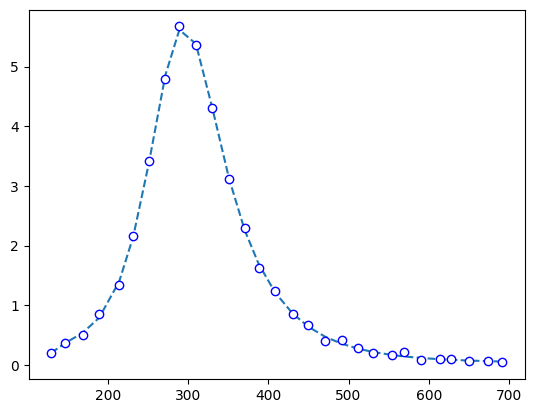

In [10]:
plt.plot(t_train, u_pred[:, 16:17] * 10, '--')
plt.plot(t_train, u_train, 'bo', markerfacecolor='w', label='Exp')
plt.show()

In [11]:
u_pred.shape

(29, 34)